# The use of axes

Axes are a great option to add at the scenario declaration in order to make a variable v evolves in a given interval.

We'll show this opportunity with the illustration of the evolution of average rate and marginal rate of the French Income Tax

#### Initialisation

We import essential modules and initialize the tax and benefit system


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from openfisca_france import FranceTaxBenefitSystem   
tax_benefit_system = FranceTaxBenefitSystem()  # Create an instance of French Tax and Benefit system

## Income Tax Concavity : a progressive system ?

Let's observe how to declare a scenario  with an income evolving between 0 euros and 100000 euros per year.

In [3]:
from openfisca_france.scenarios import init_single_entity

scenario = tax_benefit_system.new_scenario()

init_single_entity(scenario,
    
    # Axe declaration
    axes = [[
        dict(                       #  in a dictionary
            count = 100,            # 'count' : indicates the number of step
            min = 0,
            max = 100000,
            name = 'salaire_de_base', # the variable you want to make evolve
            ),
        ]],
    
    
    period = 2018,
     parent1 = dict(
        date_naissance = '1980-01-01',
         )
    )

simulation = scenario.new_simulation()

In [4]:
simulation.calculate_add('salaire_de_base', 2018)

array([     0.     ,   1010.10114,   2020.2023 ,   3030.3027 ,
         4040.4045 ,   5050.5054 ,   6060.6055 ,   7070.707  ,
         8080.809  ,   9090.909  ,  10101.011  ,  11111.11   ,
        12121.211  ,  13131.315  ,  14141.414  ,  15151.515  ,
        16161.618  ,  17171.717  ,  18181.818  ,  19191.918  ,
        20202.021  ,  21212.121  ,  22222.22   ,  23232.326  ,
        24242.422  ,  25252.525  ,  26262.63   ,  27272.725  ,
        28282.828  ,  29292.932  ,  30303.03   ,  31313.13   ,
        32323.236  ,  33333.332  ,  34343.434  ,  35353.54   ,
        36363.637  ,  37373.74   ,  38383.836  ,  39393.938  ,
        40404.043  ,  41414.14   ,  42424.242  ,  43434.344  ,
        44444.44   ,  45454.547  ,  46464.652  ,  47474.75   ,
        48484.844  ,  49494.94   ,  50505.05   ,  51515.152  ,
        52525.26   ,  53535.363  ,  54545.45   ,  55555.55   ,
        56565.656  ,  57575.76   ,  58585.863  ,  59595.953  ,
        60606.06   ,  61616.16   ,  62626.26   ,  63636

In [5]:
income_tax = - simulation.calculate('irpp', 2018)
gross_wage = simulation.calculate_add('salaire_de_base', 2018)
taxable_income = simulation.calculate_add('salaire_imposable', 2018)


Text(0.5, 0, 'Gross Wage')

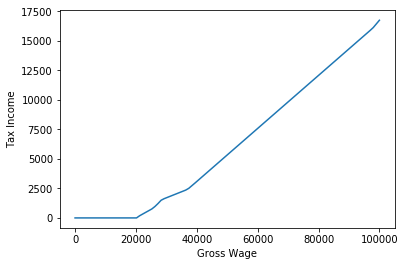

In [6]:
plt.plot(gross_wage,income_tax)
plt.ylabel(u"Tax Income")
plt.xlabel(u"Gross Wage")

**NB** : The Income Tax is flat in opposite to common opinion.

## Average rate

In [7]:
average_rate = income_tax / gross_wage
# the 1st value of gross_wage is zero, so there's a warning

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Gross Wage')

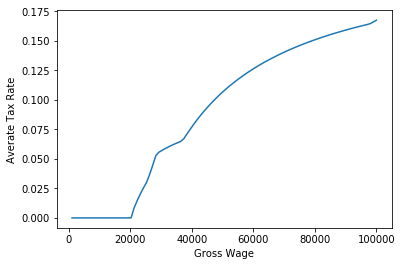

In [8]:
plt.plot(gross_wage, average_rate)
plt.ylabel("Averate Tax Rate")
plt.xlabel("Gross Wage")

## Marginal rate

In [9]:
marginal_rate =  (income_tax[:-1] - income_tax[1:]) / (taxable_income[:-1] - taxable_income[1:] ) 

Text(0.5, 0, 'Gross Wage')

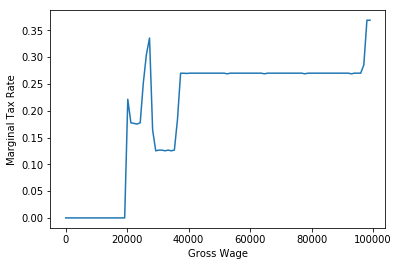

In [10]:
plt.plot(gross_wage[:-1], marginal_rate)
plt.ylabel("Marginal Tax Rate")
plt.xlabel("Gross Wage")

In [11]:
marginal_rate[25], marginal_rate[90]

(0.2517387, 0.27008486)

We can see the step in the French Tax scale of 14% and 30% (applied after a 10% deduction on the taxable income) 

### Notice :  dedicated fonctions in OpenFisca

Marginal and Average rate exist as functions implemented in OpenFisca. You can apply them on several income concept

In [12]:
from openfisca_core.rates import average_rate, marginal_rate

In [13]:
csg = simulation.calculate_add('csg', period = 2018)
csg

array([    0.     ,   -91.30643,  -182.60178,  -273.90817,  -365.21463,
        -456.50998,  -547.81635,  -639.12286,  -730.42926,  -821.7246 ,
        -913.031  , -1004.3375 , -1095.6327 , -1186.9392 , -1278.2457 ,
       -1369.541  , -1460.8475 , -1552.1538 , -1643.4492 , -1734.7556 ,
       -1826.062  , -1917.3682 , -2008.6638 , -2099.97   , -2191.2769 ,
       -2282.5723 , -2373.8784 , -2465.1846 , -2556.4802 , -2647.7861 ,
       -2739.0933 , -2830.388  , -2921.695  , -3013.001  , -3104.3076 ,
       -3195.6025 , -3286.9094 , -3378.216  , -3469.5112 , -3560.8171 ,
       -3652.124  , -3743.42   , -3834.7253 , -3926.0322 , -4017.3389 ,
       -4108.6343 , -4199.94   , -4291.2466 , -4382.5425 , -4473.849  ,
       -4565.155  , -4656.45   , -4747.757  , -4839.064  , -4930.3594 ,
       -5021.665  , -5112.9717 , -5204.2773 , -5295.5723 , -5386.88   ,
       -5478.1865 , -5569.482  , -5660.787  , -5752.094  , -5843.39   ,
       -5934.697  , -6026.002  , -6117.298  , -6208.6045 , -6299

In [14]:
1 - average_rate(-csg[1:], gross_wage[1:])

array([0.09039336, 0.09038788, 0.09038973, 0.09039062, 0.09038895,
       0.09038973, 0.09039021, 0.09039062, 0.09038973, 0.09039009,
       0.09039038, 0.09038973, 0.09038997, 0.09039021, 0.09038973,
       0.09038991, 0.09039015, 0.09038973, 0.09038991, 0.09039009,
       0.09039021, 0.09038985, 0.09038997, 0.09039021, 0.09038985,
       0.09038997, 0.09039009, 0.09038985, 0.09038991, 0.09039009,
       0.09038979, 0.09038991, 0.09039003, 0.09039015, 0.09038991,
       0.09039003, 0.09039009, 0.09038991, 0.09038997, 0.09039009,
       0.09038991, 0.09038997, 0.09039003, 0.09039015, 0.09038997,
       0.09038997, 0.09039009, 0.09038997, 0.09039003, 0.09039009,
       0.09038991, 0.09038997, 0.09039003, 0.09038991, 0.09038997,
       0.09039003, 0.09039009, 0.09038991, 0.09039003, 0.09039009,
       0.09038997, 0.09038997, 0.09039003, 0.09038991, 0.09039003,
       0.09039003, 0.09038991, 0.09038997, 0.09039003, 0.09039009,
       0.09038997, 0.09039003, 0.09039009, 0.09038997, 0.09038

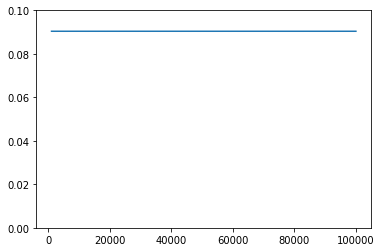

In [15]:
plt.ylim(0,0.1)
plt.plot(gross_wage[1:], 1-average_rate(-csg[1:], gross_wage[1:]))